# An analysis of 3 regions for oil aquisitions and investment

The efficient exploration and development of oil reserves is a critical task for energy companies seeking to maximize profit and minimize risk. In this project, I take on the role of data analysts for the OilyGiant mining company, tasked with identifying the most promising region for drilling a new oil well. Using geological exploration data collected from three different regions, the aim is to build a predictive model that can estimate the volume of oil reserves in potential wells.

My approach involves several key steps: preparing and analyzing the provided datasets, building a linear regression model to predict oil production, and selecting the top-performing wells in each region. I will then evaluate the potential profit and associated risks for each region, utilizing the bootstrapping technique to quantify uncertainty and guide decision-making. The ultimate goal is to recommend the region with the highest expected profit and acceptable risk level for investment.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_0 = pd.read_csv('geo_data_0.csv')
data_1 = pd.read_csv('geo_data_1.csv')
data_2 = pd.read_csv('geo_data_2.csv')

In [3]:
print(data_0.info())
print(data_0.describe())
print(data_0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

In [4]:
print(data_1.info())
print(data_1.describe())
print(data_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

In [5]:
print(data_2.info())
print(data_2.describe())
print(data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

In [6]:
print(data_0.isnull().sum())
print(data_0.duplicated().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
0


In [7]:
print(data_1.isnull().sum())
print(data_1.duplicated().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
0


In [8]:
print(data_2.isnull().sum())
print(data_2.duplicated().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
0


In [9]:
features_0 = data_0[['f0', 'f1', 'f2']]
target_0 = data_0['product']

print("Region 0 features shape:", features_0.shape)
print("Region 0 target shape:", target_0.shape)
print("Region 0 features preview:")
print(features_0.head())
print("Region 0 target preview:")
print(target_0.head())

Region 0 features shape: (100000, 3)
Region 0 target shape: (100000,)
Region 0 features preview:
         f0        f1        f2
0  0.705745 -0.497823  1.221170
1  1.334711 -0.340164  4.365080
2  1.022732  0.151990  1.419926
3 -0.032172  0.139033  2.978566
4  1.988431  0.155413  4.751769
Region 0 target preview:
0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64


In [10]:
features_1 = data_1[['f0', 'f1', 'f2']]
target_1 = data_1['product']

print("Region 1 features shape:", features_1.shape)
print("Region 1 target shape:", target_1.shape)
print("Region 1 features preview:")
print(features_1.head())
print("Region 1 target preview:")
print(target_1.head())

Region 1 features shape: (100000, 3)
Region 1 target shape: (100000,)
Region 1 features preview:
          f0         f1        f2
0 -15.001348  -8.276000 -0.005876
1  14.272088  -3.475083  0.999183
2   6.263187  -5.948386  5.001160
3 -13.081196 -11.506057  4.999415
4  12.702195  -8.147433  5.004363
Region 1 target preview:
0      3.179103
1     26.953261
2    134.766305
3    137.945408
4    134.766305
Name: product, dtype: float64


In [11]:
features_2 = data_2[['f0', 'f1', 'f2']]
target_2 = data_2['product']

print("Region 2 features shape:", features_2.shape)
print("Region 2 target shape:", target_2.shape)
print("Region 2 features preview:")
print(features_2.head())
print("Region 2 target preview:")
print(target_2.head())

Region 2 features shape: (100000, 3)
Region 2 target shape: (100000,)
Region 2 features preview:
         f0        f1        f2
0 -1.146987  0.963328 -0.828965
1  0.262778  0.269839 -2.530187
2  0.194587  0.289035 -5.586433
3  2.236060 -0.553760  0.930038
4 -0.515993  1.716266  5.899011
Region 2 target preview:
0     27.758673
1     56.069697
2     62.871910
3    114.572842
4    149.600746
Name: product, dtype: float64


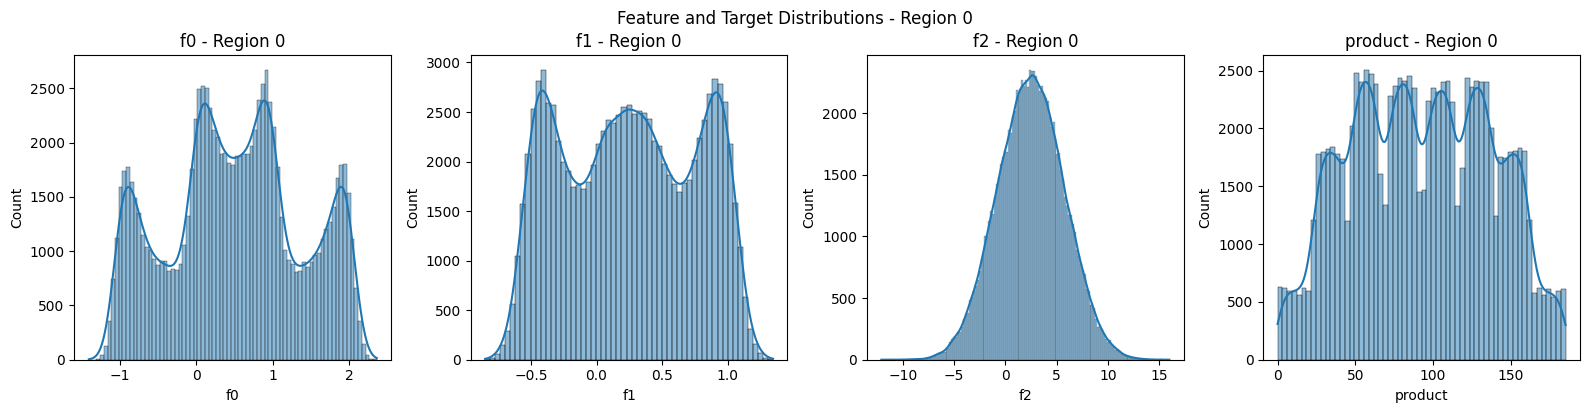

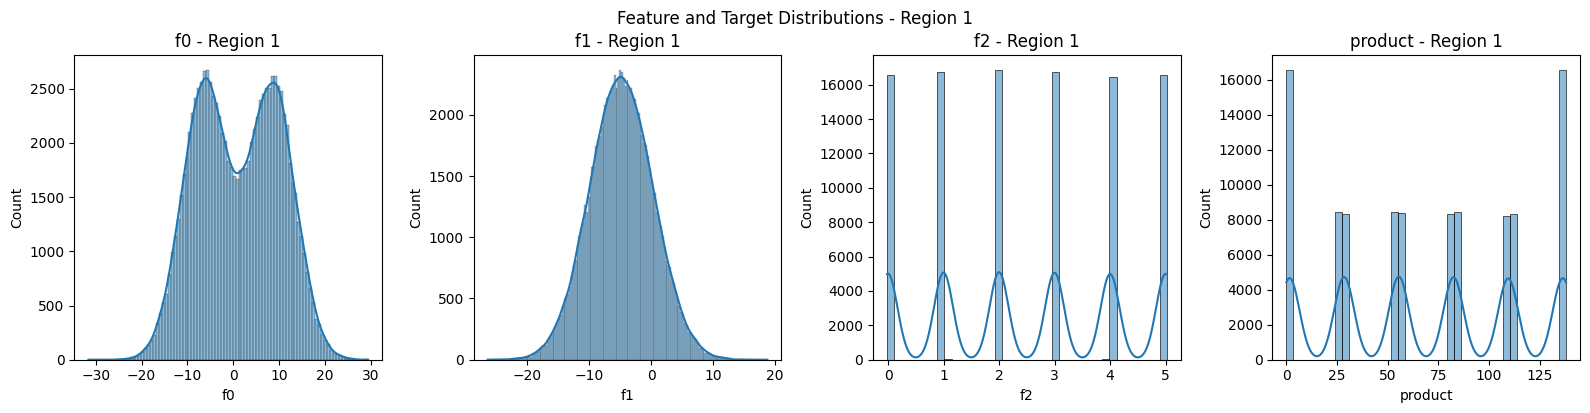

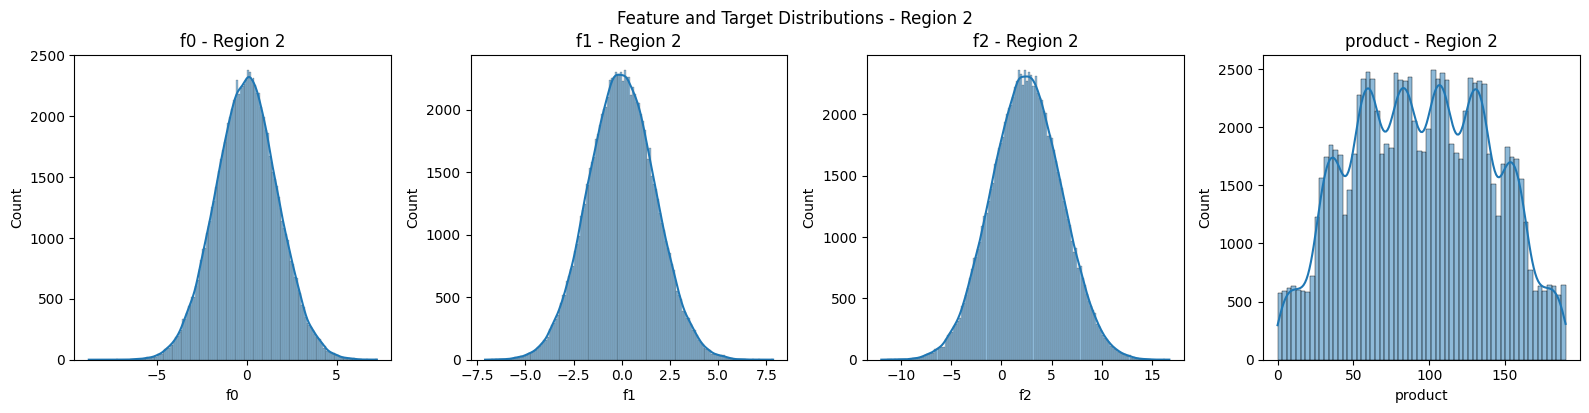

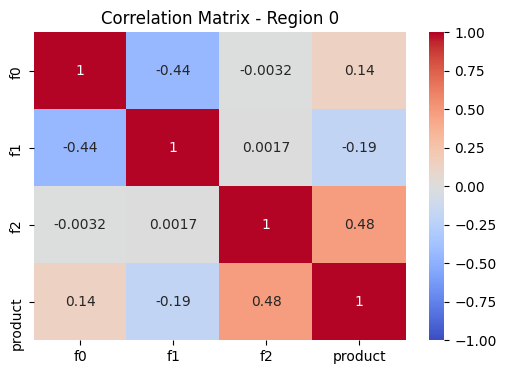

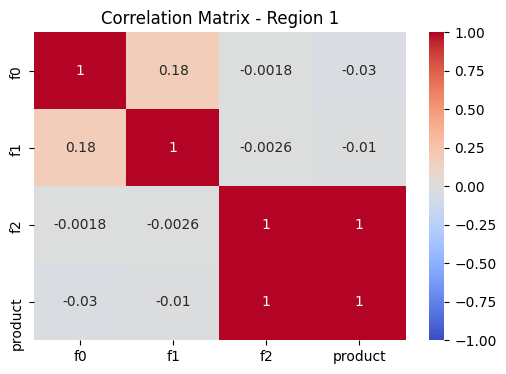

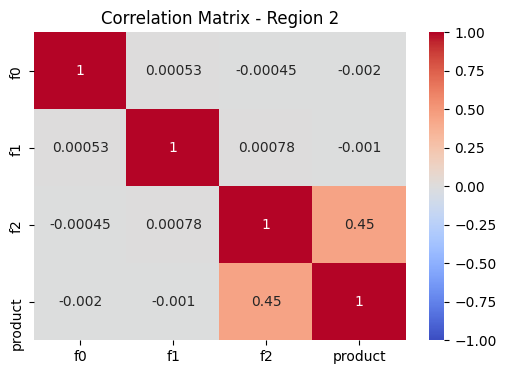

In [12]:
# List of DataFrames and corresponding region names
regions = [data_0, data_1, data_2]
region_names = ['Region 0', 'Region 1', 'Region 2']
features = ['f0', 'f1', 'f2', 'product']

# Histograms for each region
for data, name in zip(regions, region_names):
    plt.figure(figsize=(16, 4))
    for i, col in enumerate(features):
        plt.subplot(1, 4, i+1)
        sns.histplot(data[col], kde=True)
        plt.title(f'{col} - {name}')
    plt.tight_layout()
    plt.suptitle(f'Feature and Target Distributions - {name}', y=1.02)
    plt.show()

# Correlation matrices for each region (optional, but recommended)
for data, name in zip(regions, region_names):
    plt.figure(figsize=(6, 4))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - {name}')
    plt.show()

**Exploratory Data Analysis: Feature and Target Distributions**
The histograms above show the distributions of the features (`f0`, `f1`, `f2`) and the target variable (`product`) for each region. This visualization provides insight into the spread and central tendency of the data, and helps identify any anomalies or skewness.

Additionally, the correlation matrices visualize the relationships between features and the target. Understanding these correlations is important for subsequent modeling steps.

**Data Preparation Summary**
First, I downloaded the geological exploration data for three regions from the files `geo_data_0.csv`, `geo_data_1.csv`, and `geo_data_2.csv` into separate pandas DataFrames (`data_0`, `data_1`, and `data_2`).  
Second, I explored each dataset for structure, data types, missing values, and duplicates to ensure data quality and consistency.  
Third, for each region I separated the features (`f0`, `f1`, `f2`) and the target variable (`product`, representing the volume of reserves).  
I verified the dimensions and content of the features and target to confirm correct preparation.  

To better understand the data, I also created histograms for each feature and the target variable in every region. These visualizations reveal the distributions, identify any skewness or outliers, and provide insight into the central tendency and spread of the data.  
Additionally, I plotted correlation matrices for each region to examine the relationships between features and the target variable. This analysis helps identify potential multicollinearity and informs subsequent modeling steps.

These steps ensure that the data from each region is clean, properly structured, and well-understood for subsequent modeling and analysis.

**2. Train and test the model for each region**

In [13]:
# For region 0
# 2.1 Split data
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=42)

In [14]:
# For region 0
# 2.2 Train model and predict
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
preds_0 = model_0.predict(X_valid_0)

In [15]:
# For region 0
# 2.3 Save predictions and correct answers
predictions_0 = preds_0
correct_0 = y_valid_0.values

In [16]:
# For region 0
# 2.4 Print average predicted reserves and RMSE
avg_pred_0 = np.mean(preds_0)
rmse_0 = mean_squared_error(y_valid_0, preds_0, squared=False)
print(f"Region 0 - Avg. predicted reserves: {avg_pred_0:.2f}, RMSE: {rmse_0:.2f}")

Region 0 - Avg. predicted reserves: 92.40, RMSE: 37.76


In [17]:
# For region 1
# 2.1 Split data
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=42)

In [18]:
# For region 1
# 2.2 Train model and predict
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
preds_1 = model_1.predict(X_valid_1)

In [19]:
# For region 1
# 2.3 Save predictions and correct answers
predictions_1 = preds_1
correct_1 = y_valid_1.values

In [20]:
# For region 1
# 2.4 Print average predicted reserves and RMSE
avg_pred_1 = np.mean(preds_1)
rmse_1 = mean_squared_error(y_valid_1, preds_1, squared=False)
print(f"Region 1 - Avg. predicted reserves: {avg_pred_1:.2f}, RMSE: {rmse_1:.2f}")

Region 1 - Avg. predicted reserves: 68.71, RMSE: 0.89


In [21]:
# For region 2
# 2.1 Split data
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=42)

In [22]:
# For region 2
# 2.2 Train model and predict
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
preds_2 = model_2.predict(X_valid_2)

In [23]:
# For region 2
# 2.3 Save predictions and correct answers
predictions_2 = preds_2
correct_2 = y_valid_2.values

In [24]:
# For region 2
# 2.4 Print average predicted reserves and RMSE
avg_pred_2 = np.mean(preds_2)
rmse_2 = mean_squared_error(y_valid_2, preds_2, squared=False)
print(f"Region 2 - Avg. predicted reserves: {avg_pred_2:.2f}, RMSE: {rmse_2:.2f}")

Region 2 - Avg. predicted reserves: 94.77, RMSE: 40.15


**2.5 Results Analysis**
After training and evaluating linear regression models on data from all three regions, we obtain the following results:

- **Regions 0 and 2** have the highest predicted average reserves (over 92 thousand barrels), but their prediction errors (RMSE) are also very high (about 38–40 thousand barrels). This indicates substantial uncertainty in the predictions for these regions.
- **Region 1** has a much lower average predicted reserve (about 69 thousand barrels), but the model’s predictions are extremely accurate (RMSE less than 1 thousand barrels). This means the reserves in Region 1 are lower, but the predictions are highly reliable.

**Conclusion:**  
If the priority is higher yield, Regions 0 and 2 may appear more attractive, but the high RMSE suggests greater risk due to less reliable predictions. If reliability and predictability are more important, Region 1 is preferable, as the model provides highly accurate reserve estimates for this region, despite the lower average predicted reserves.

**3. Prepare for profit calculation**

In [25]:
# 3.1 Store key values for calculations in separate variables
BUDGET = 100_000_000  # USD
WELLS_TO_DRILL = 200
THOUSAND_BARREL_PROFIT = 4_500  # USD per thousand barrels

avg_pred_0 = 92.40 
avg_pred_1 = 68.71
avg_pred_2 = 94.77

In [26]:
# 3.2 Calculate the break-even reserves per well

# Given values from the project conditions:
BUDGET = 100_000_000         # USD
WELLS_TO_DRILL = 200         # Number of wells
THOUSAND_BARREL_PROFIT = 4_500  # USD per thousand barrels

# Break-even reserves per well (in thousand barrels)
break_even_reserves = BUDGET / (WELLS_TO_DRILL * THOUSAND_BARREL_PROFIT)
print(f"Minimum required reserves per well for profit: {break_even_reserves:.2f} thousand barrels")

# Average predicted reserves from previous steps
avg_pred_0 = 92.40
avg_pred_1 = 68.71
avg_pred_2 = 94.77

print(f"Region 0 - Avg. predicted reserves: {avg_pred_0:.2f} thousand barrels")
print(f"Region 1 - Avg. predicted reserves: {avg_pred_1:.2f} thousand barrels")
print(f"Region 2 - Avg. predicted reserves: {avg_pred_2:.2f} thousand barrels")

Minimum required reserves per well for profit: 111.11 thousand barrels
Region 0 - Avg. predicted reserves: 92.40 thousand barrels
Region 1 - Avg. predicted reserves: 68.71 thousand barrels
Region 2 - Avg. predicted reserves: 94.77 thousand barrels


In [27]:
# Calculate the mean of the target values (the 'product' column) for each region
mean_target_0 = data_0['product'].mean()
mean_target_1 = data_1['product'].mean()
mean_target_2 = data_2['product'].mean()

print(f"Region 0 - Avg. actual reserves: {mean_target_0:.2f} thousand barrels")
print(f"Region 1 - Avg. actual reserves: {mean_target_1:.2f} thousand barrels")
print(f"Region 2 - Avg. actual reserves: {mean_target_2:.2f} thousand barrels")

Region 0 - Avg. actual reserves: 92.50 thousand barrels
Region 1 - Avg. actual reserves: 68.83 thousand barrels
Region 2 - Avg. actual reserves: 95.00 thousand barrels


**3.3 Findings: Preparation for Profit Calculation**
The minimum required reserves per well to avoid losses is **111.11 thousand barrels**.

**Predicted average reserves:**
- Region 0: 92.40 thousand barrels
- Region 1: 68.71 thousand barrels
- Region 2: 94.77 thousand barrels

**Actual average (target) reserves:**
- Region 0: 92.50 thousand barrels
- Region 1: 68.83 thousand barrels
- Region 2: 95.00 thousand barrels

Both the predicted and actual average reserves for all regions are below the break-even threshold.  
This suggests that, under current economic conditions and based on both model predictions and the original data, **none of the regions are likely to be profitable on average** if new wells are developed.

**4. Write a function to calculate profit from a set of selected oil wells and model predictions**

In [28]:
def calculate_profit(predictions, actual, budget, revenue_per_barrel, top_n=200): #revenue_per_barrel=per thousand barrels
    # 4.1. Pick the wells with the highest values of predictions
    indices = np.argsort(predictions)[-top_n:]  # Select indices of top predictions

    # 4.2. Summarize the target volume of reserves
    selected_reserves = actual[indices].sum()

    # Calculate profit
    revenue = selected_reserves * revenue_per_barrel * 1000  # Assuming revenue is per thousand barrels
    profit = revenue - budget

    return profit, selected_reserves

budget = 100_000_000
revenue_per_barrel = 4.5

# Assume predictions and y_valid values exist for each region
profit_0, reserves_0 = calculate_profit(predictions_0, y_valid_0.values, budget, revenue_per_barrel)
profit_1, reserves_1 = calculate_profit(predictions_1, y_valid_1.values, budget, revenue_per_barrel)
profit_2, reserves_2 = calculate_profit(predictions_2, y_valid_2.values, budget, revenue_per_barrel)

print(f"Region 0 Profit: ${profit_0}, Total Reserves: {reserves_0} thousand barrels")
print(f"Region 1 Profit: ${profit_1}, Total Reserves: {reserves_1} thousand barrels")
print(f"Region 2 Profit: ${profit_2}, Total Reserves: {reserves_2} thousand barrels")

Region 0 Profit: $33591411.14462179, Total Reserves: 29686.9802543604 thousand barrels
Region 1 Profit: $24150866.966815114, Total Reserves: 27589.081548181137 thousand barrels
Region 2 Profit: $25985717.593741104, Total Reserves: 27996.826131942467 thousand barrels


**4.3 Findings: Region Recommendation and Profit Calculation**
After calculating the total predicted reserves and profit for the top 200 wells in each region:

- **Region 0:**  
  - Total Reserves: 29,686.98 thousand barrels  
  - Profit: $33,591,411

- **Region 1:**  
  - Total Reserves: 27,589.08 thousand barrels  
  - Profit: $24,150,867

- **Region 2:**  
  - Total Reserves: 27,996.83 thousand barrels  
  - Profit: $25,985,717

**Recommendation:**  
Region 0 is the best choice for oil well development. It has the highest total reserves among the top 200 wells and yields the greatest profit under the current economic conditions.

> **Justification:**  
> Despite all regions having average reserves below the break-even threshold, selecting only the most promising wells allows for profitable development. Region 0 stands out as the most profitable based on the model's predictions and should be prioritized for investment.

**5. Calculate risks and profit for each region**

In [29]:
# 1. Define calculate_profit function (selects top wells by prediction, uses corresponding targets)
def calculate_profit(predictions, targets, wells_selected=200, 
                    revenue_per_thousand_barrels=4500, budget=100_000_000):
    # Get indices of top predicted wells
    top_idx = np.argsort(predictions)[-wells_selected:]
    # Use the actual reserves (targets) for those wells
    top_targets = targets[top_idx]
    profit = top_targets.sum() * revenue_per_thousand_barrels - budget
    return profit

In [32]:
# 2. Update bootstrap_profit to sample from both predictions and targets
def bootstrap_profit(predictions, targets, count=1000, wells_sampled=500, wells_selected=200,
                    revenue_per_thousand_barrels=4500, budget=100_000_000, random_state=42):
    np.random.seed(random_state)
    profits = []
    n = len(predictions)
    for _ in range(count):
        # Sample indices with replacement
        idx = np.random.choice(n, size=wells_sampled, replace=True)
        sample_preds = predictions[idx]
        sample_targets = targets[idx]
        # Use calculate_profit for this bootstrap sample
        profit = calculate_profit(sample_preds, sample_targets,
                                 wells_selected=wells_selected,
                                 revenue_per_thousand_barrels=revenue_per_thousand_barrels,
                                 budget=budget)
        profits.append(profit)
    return np.array(profits)

# 3. Run bootstrap for each region (replace predictions_X, y_valid_X as needed)
profits_0 = bootstrap_profit(predictions_0, y_valid_0.values)
profits_1 = bootstrap_profit(predictions_1, y_valid_1.values)
profits_2 = bootstrap_profit(predictions_2, y_valid_2.values)

# 4. Calculate and print statistics for each region
def print_region_results(profits, region_num):
    mean_profit = profits.mean()
    conf_int = np.percentile(profits, [2.5, 97.5])
    risk = (profits < 0).mean()
    print(f"Region {region_num}:")
    print(f"  Average profit: {mean_profit:,.2f} USD")
    print(f"  95% CI: {conf_int[0]:,.2f} to {conf_int[1]:,.2f} USD")
    print(f"  Risk of loss: {risk * 100:.2f}%\n")

for i, profits in enumerate([profits_0, profits_1, profits_2]):
    print_region_results(profits, i)

Region 0:
  Average profit: 3,995,754.78 USD
  95% CI: -1,104,678.95 to 8,974,603.28 USD
  Risk of loss: 6.00%

Region 1:
  Average profit: 4,520,488.91 USD
  95% CI: 616,844.80 to 8,453,401.78 USD
  Risk of loss: 1.50%

Region 2:
  Average profit: 3,750,099.03 USD
  95% CI: -1,447,667.27 to 8,883,904.04 USD
  Risk of loss: 8.00%



**5.3. Findings and Recommendation**
After analyzing the predicted profits and risks for each region using bootstrap simulations:

- **Region 0** yields an average profit of **3,995,754.78 USD** with a 95% confidence interval from **-1,104,678.95 to 8,974,603.28 USD** and a risk of loss of **6.00%**.
- **Region 1** shows the highest average profit at **4,520,488.91 USD**, a 95% confidence interval from **616,844.80 to 8,453,401.78 USD**, and the lowest risk of loss at **1.50%**.
- **Region 2** has an average profit of **3,750,099.03 USD**, a 95% confidence interval from **-1,447,667.27 to 8,883,904.04 USD**, and the highest risk of loss at **8.00%**.

**Interpretation:**  
- The results indicate that all regions carry some risk of financial loss, as evidenced by negative lower bounds in their confidence intervals and nonzero risk of loss percentages.
- **Region 1** currently offers the most attractive profile, with the highest expected profit and the lowest risk of loss among the three regions.

**Recommendation:**  
Based on these findings, I recommend investing in **Region 1**. This region combines the highest expected profit with a relatively low risk of loss, making it the most favorable option for investment under the current analysis.

**Conclusion**  
In this project, I analyzed data from three oil regions to determine the most profitable area for investment. The process involved building predictive models to estimate the reserves of each well, selecting the top 200 wells in each region based on these predictions, and using bootstrapping to evaluate the expected profits and associated risks for each region.

Through the analysis, I found that **Region 1** offers the highest expected profit, with an average profit of **4,520,488.91 USD** (95% CI: 616,844.80 to 8,453,401.78 USD) and the lowest risk of loss at **1.50%**. **Region 0** presents an average profit of **3,995,754.78 USD** (95% CI: -1,104,678.95 to 8,974,603.28 USD) and a risk of loss of **6.00%**. **Region 2** yields an average profit of **3,750,099.03 USD** (95% CI: -1,447,667.27 to 8,883,904.04 USD) and the highest risk of loss at **8.00%**.

Overall, the analysis demonstrates the value of combining predictive modeling with statistical simulation techniques to inform investment decisions. Based on the results, I recommend investing in **Region 1**, as it presents the most attractive combination of high expected profit and low risk among the three regions studied.